In [7]:
from torchkernels.feature_maps import (
    LaplacianORF, LaplacianRFF,
    GaussianORF, GaussianRFF,
    MaternORF, MaternRFF,
    ExpPowerORF, ExpPowerRFF
    )
from utils import create_kernel_str, create_x1_x2_list, create_Kmat_exact, create_plots

In [8]:
kernels = ["Gaussian", "Laplacian", "Matern", "ExpPower"]
input_dim = 32
num_features = int(3e4)
length_scale = 1.
nu = 1.5
alpha = 0.7
bias_term = False
approximations = ['RFF', 'ORF']
kernel_str_dict = {kernel: create_kernel_str(kernel, nu, alpha) for kernel in kernels}
print("Creating sample datapoints")
x1_list, x2_list, x1_x2_norm = create_x1_x2_list(input_dim=input_dim, nu=nu, alpha=alpha, length_scale=length_scale, N=20)
print("Evaluating the exact kernel")
K_mat_exact_dict = create_Kmat_exact(kernels=kernels, x1_list=x1_list, x2_list=x2_list, length_scale=length_scale, nu=nu, alpha=alpha)
K_mat_approx_dict = {}
print("Evaluating the approximate kernel")

Creating sample datapoints
Evaluating the exact kernel
Evaluating the approximate kernel


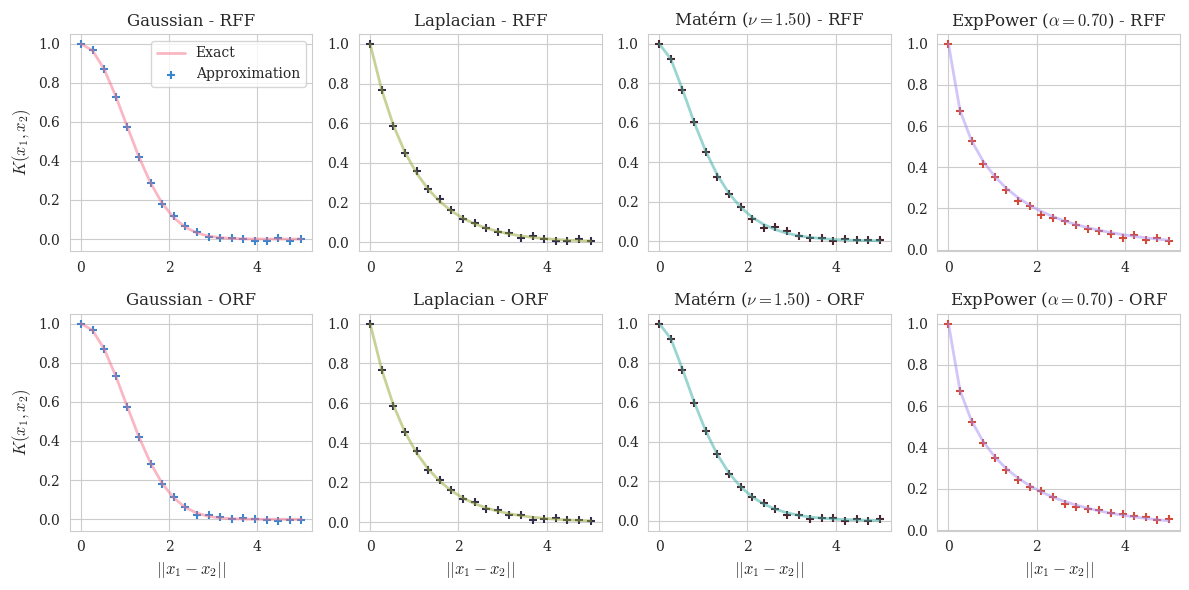

In [9]:
for kernel in kernels:
    K_mat_approx_dict[kernel] = {}
    for approx in approximations:
        K_mat_approx_dict[kernel][approx] = []
        
        if approx == "RFF":
            K_func_approx = {"Laplacian": LaplacianRFF, "Gaussian": GaussianRFF, "Matern": MaternRFF, "ExpPower": ExpPowerRFF}
        else: 
            K_func_approx = {"Laplacian": LaplacianORF, "Gaussian": GaussianORF, "Matern": MaternORF, "ExpPower": ExpPowerORF}
        
        if kernel == "ExpPower":
            feature_map = K_func_approx[kernel](num_features=num_features, input_dim=input_dim, length_scale=length_scale, alpha=alpha, bias_term=bias_term)
        elif kernel == "Matern":
            feature_map = K_func_approx[kernel](num_features=num_features, input_dim=input_dim, length_scale=length_scale, nu=nu, bias_term=bias_term)
        else:
            feature_map = K_func_approx[kernel](num_features=num_features, input_dim=input_dim, length_scale=length_scale, bias_term=bias_term)
        
        for x1,x2 in zip(x1_list, x2_list):
            Phi_x1 = feature_map(x1)
            Phi_x2 = feature_map(x2)
            K_mat_approx_dict[kernel][approx].append((Phi_x1@Phi_x2.T)[0].item())
create_plots(kernels=kernels, approximations=approximations, K_mat_exact_dict=K_mat_exact_dict, K_mat_approx_dict=K_mat_approx_dict, x1_x2_norm=x1_x2_norm, kernel_str_dict=kernel_str_dict)